# Understanding U-V grid and Phi-Theta grid 

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import grasp2alm as g2a

Read a `grid file` representing a `Gauss Beam` which I created directly from GRASP.

I use the g2a code to read the file keeping just:

- Grid parameters 

- Field components.

In [156]:
gridfile = "../test/beam_files/gauss.grd"
grid = g2a.BeamGrid(gridfile)

"Grid Parameters: ", grid.xs, grid.ys, grid.xe, grid.ye, grid.nx, grid.ny , "Field components: ", grid.amp


('Grid Parameters: ',
 -0.2,
 -0.2,
 0.2,
 0.2,
 101,
 101,
 'Field components: ',
 array([[[-1.07011171e-03+0.j, -1.31774669e-03+0.j, -1.61559698e-03+0.j,
          ..., -1.61559698e-03+0.j, -1.31774669e-03+0.j,
          -1.07011171e-03+0.j],
         [-1.31774669e-03+0.j, -1.62239655e-03+0.j, -1.98875894e-03+0.j,
          ..., -1.98875894e-03+0.j, -1.62239655e-03+0.j,
          -1.31774669e-03+0.j],
         [-1.61559698e-03+0.j, -1.98875894e-03+0.j, -2.43743491e-03+0.j,
          ..., -2.43743491e-03+0.j, -1.98875894e-03+0.j,
          -1.61559698e-03+0.j],
         ...,
         [-1.61559698e-03+0.j, -1.98875894e-03+0.j, -2.43743491e-03+0.j,
          ..., -2.43743491e-03+0.j, -1.98875894e-03+0.j,
          -1.61559698e-03+0.j],
         [-1.31774669e-03+0.j, -1.62239655e-03+0.j, -1.98875894e-03+0.j,
          ..., -1.98875894e-03+0.j, -1.62239655e-03+0.j,
          -1.31774669e-03+0.j],
         [-1.07011171e-03+0.j, -1.31774669e-03+0.j, -1.61559698e-03+0.j,
          ..., -1.61

Create the `u-v grid` and convert it in `phi-theta`

In [157]:
u = np.linspace(grid.xs,grid.xe,grid.nx)
v = np.linspace(grid.ys,grid.ye,grid.ny)
uv_grid = np.meshgrid(u,v)
pt_grid = [ np.arctan2(uv_grid[1],uv_grid[0]) , np.arcsin(np.sqrt(uv_grid[0]**2+uv_grid[1]**2))  ]
pt_grid = np.rad2deg(pt_grid)
pt_grid[0] = pt_grid[0] + 180

`Plot` of both `grids`, this help to understand how the u-v grid is mapped in phi-theta coordinates

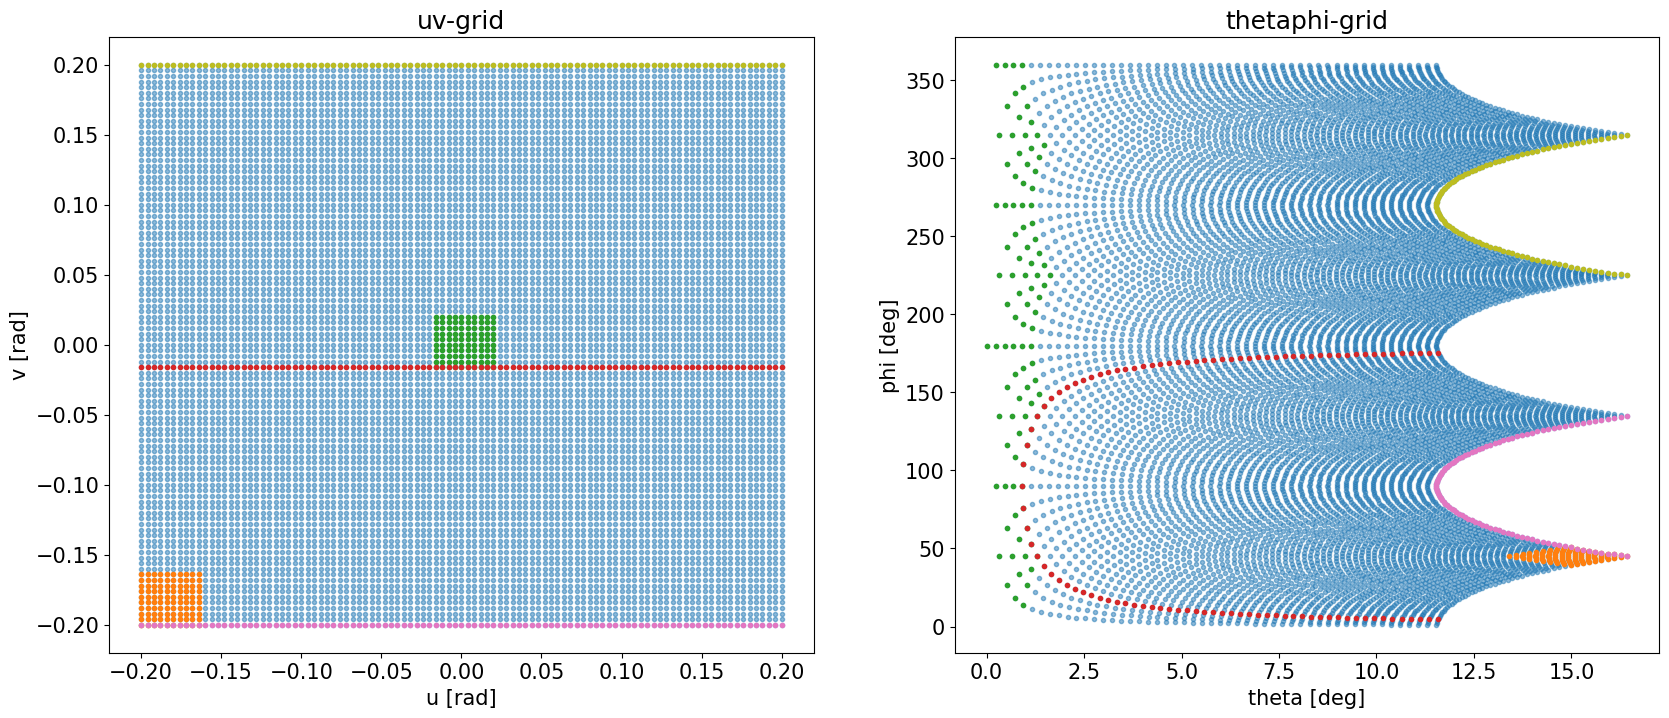

In [158]:
#idx for the grid plot
side_grid = uv_grid[0][0].size
side_square = round(side_grid*0.1)
begin_square = slice(0,side_square)
central_square = slice( round(0.5*(side_grid - side_square)), round(0.5*(side_grid + side_square)) )


begin_line = 0
central_line = round(0.5*(side_grid - side_square))
end_line = -1


fig, axs = plt.subplots(1,2,figsize=(20,8))
plt.rcParams['font.size'] = 15

axs[0].set_title('uv-grid')
axs[1].set_title('thetaphi-grid')

axs[0].set_xlabel('u [rad]')
axs[0].set_ylabel('v [rad]')

axs[1].set_xlabel('theta [deg]')
axs[1].set_ylabel('phi [deg]')


axs[0].scatter(uv_grid[0],uv_grid[1],marker='.',alpha=0.5)
axs[0].scatter(uv_grid[0][begin_square,begin_square],uv_grid[1][begin_square,begin_square],marker='.',c='C1')
axs[0].scatter(uv_grid[0][central_square,central_square],uv_grid[1][central_square,central_square],marker='.',c='C2')
axs[0].scatter(uv_grid[0][central_line],uv_grid[1][central_line],marker='.',c='C3')
axs[0].scatter(uv_grid[0][begin_line],uv_grid[1][begin_line],marker='.',c='C6')
axs[0].scatter(uv_grid[0][end_line],uv_grid[1][end_line],marker='.',c='C8')

axs[1].scatter(pt_grid[1],pt_grid[0],marker='.',alpha=0.5)
axs[1].scatter(pt_grid[1][begin_square,begin_square],pt_grid[0][begin_square,begin_square],marker='.',c='C1')
axs[1].scatter(pt_grid[1][central_square,central_square],pt_grid[0][central_square,central_square],marker='.',c='C2')
axs[1].scatter(pt_grid[1][central_line],pt_grid[0][central_line],marker='.',c='C3')
axs[1].scatter(pt_grid[1][begin_line],pt_grid[0][begin_line],marker='.',c='C6')
axs[1].scatter(pt_grid[1][end_line],pt_grid[0][end_line],marker='.',c='C8')



plt.show()

Compute the Stokes Parameters

In [159]:
modc = np.abs(grid.amp[0])**2
modx = np.abs(grid.amp[1])**2

I = modc + modx
Q = modc - modx
U = 2*np.real( grid.amp[0] * np.conj(grid.amp[1]) )

stokes = {
        'I':I,
        'Q':Q,
        'U':U
        }


Plot the Stokes parameters `I,Q,U` over the `u-v` grid and over the `phi-theta` grid

/var/folders/lq/j912jnfn2h7dtcpxsk6h_0yc0000gn/T/ipykernel_60009/3854506212.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axs[i,1].pcolormesh(pt_grid[1], pt_grid[0], stokes[s])


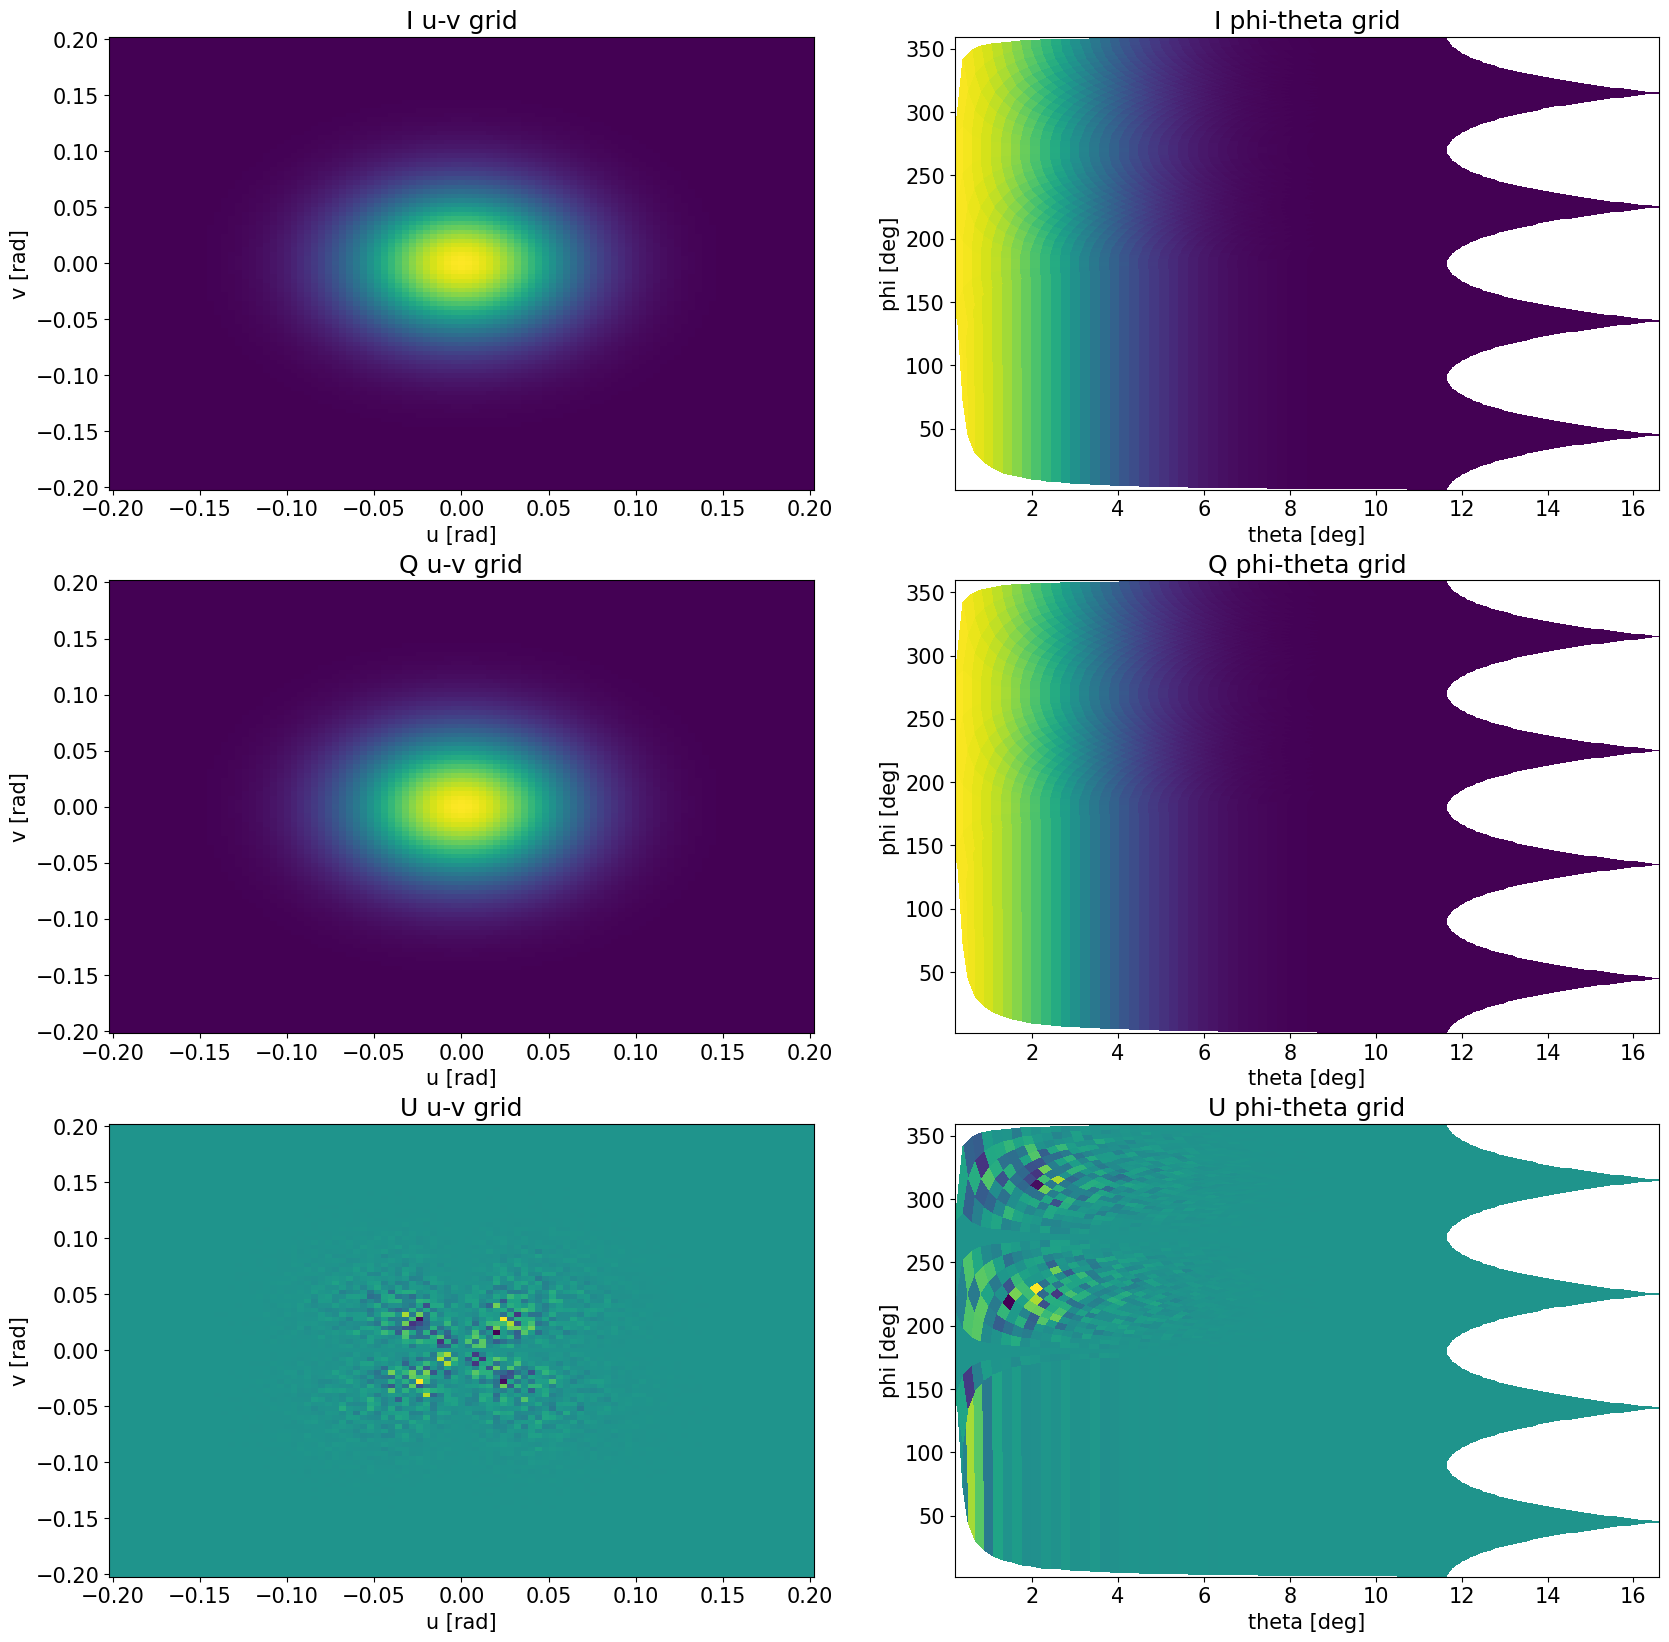

In [160]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
plt.rcParams['font.size'] = 15

for i,s in enumerate('IQU'):
    axs[i,0].set_title(f'{s} u-v grid')
    axs[i,1].set_title(f'{s} phi-theta grid')

    axs[i,0].pcolormesh(uv_grid[0], uv_grid[1], stokes[s])
    axs[i,1].pcolormesh(pt_grid[1], pt_grid[0], stokes[s])
    
    axs[i,0].set_xlabel('u [rad]')
    axs[i,0].set_ylabel('v [rad]')
    axs[i,1].set_xlabel('theta [deg]')
    axs[i,1].set_ylabel('phi [deg]')
